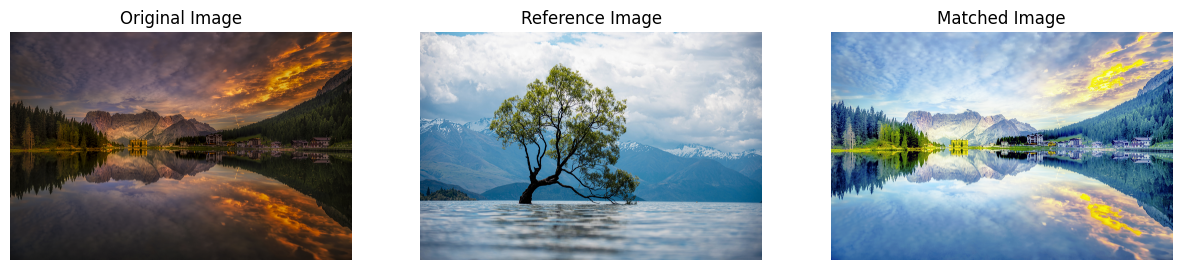

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_matching(source, reference):
    """Matches the histogram of the source image to the reference image for each channel."""
    matched_channels = []

    # Process each color channel separately (B, G, R)
    for i in range(3):
        src_channel = source[:, :, i]
        ref_channel = reference[:, :, i]

        # Compute histograms
        src_hist, _ = np.histogram(src_channel.flatten(), bins=256, range=[0, 256])
        ref_hist, _ = np.histogram(ref_channel.flatten(), bins=256, range=[0, 256])

        # Compute CDFs
        src_cdf = np.cumsum(src_hist).astype(np.float32)
        ref_cdf = np.cumsum(ref_hist).astype(np.float32)

        # Normalize CDFs
        src_cdf = (src_cdf / src_cdf[-1]) * 255
        ref_cdf = (ref_cdf / ref_cdf[-1]) * 255

        # Create mapping function
        mapping = np.interp(src_cdf, ref_cdf, np.arange(256)).astype(np.uint8)

        # Apply mapping to the channel
        matched_channel = mapping[src_channel]
        matched_channels.append(matched_channel)

    # Merge channels to form the final matched image
    return cv2.merge(matched_channels)

# Load images
source_image = cv2.imread("/content/h.jpg")  # Source image
reference_image = cv2.imread("/content/t.jpg")  # Reference image

# Ensure images are loaded
if source_image is None or reference_image is None:
    print("Error: Could not load images. Check file paths.")
else:
    # Perform histogram matching
    matched_image = histogram_matching(source_image, reference_image)

    # Convert BGR to RGB for visualization
    source_rgb = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)
    reference_rgb = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)
    matched_rgb = cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB)

    # Display images using Matplotlib
    plt.figure(figsize=(15, 5))

    images = [source_rgb, reference_rgb, matched_rgb]
    titles = ["Original Image", "Reference Image", "Matched Image"]

    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis("off")

    plt.show()


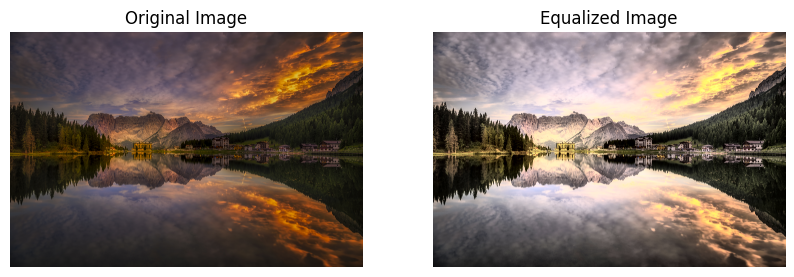

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization_color(image):
    """Applies histogram equalization to a color image channel-wise."""
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)  # Convert to YUV color space
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])  # Apply equalization only on Y channel
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)  # Convert back to BGR

# Load image
image = cv2.imread("/content/h.jpg")

# Ensure the image is loaded
if image is None:
    print("Error: Could not load image. Check file path.")
else:
    # Perform histogram equalization
    equalized_image = histogram_equalization_color(image)

    # Convert BGR to RGB for visualization
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    equalized_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB)

    # Display images using Matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original_rgb)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Equalized Image")
    plt.imshow(equalized_rgb)
    plt.axis("off")

    plt.show()
